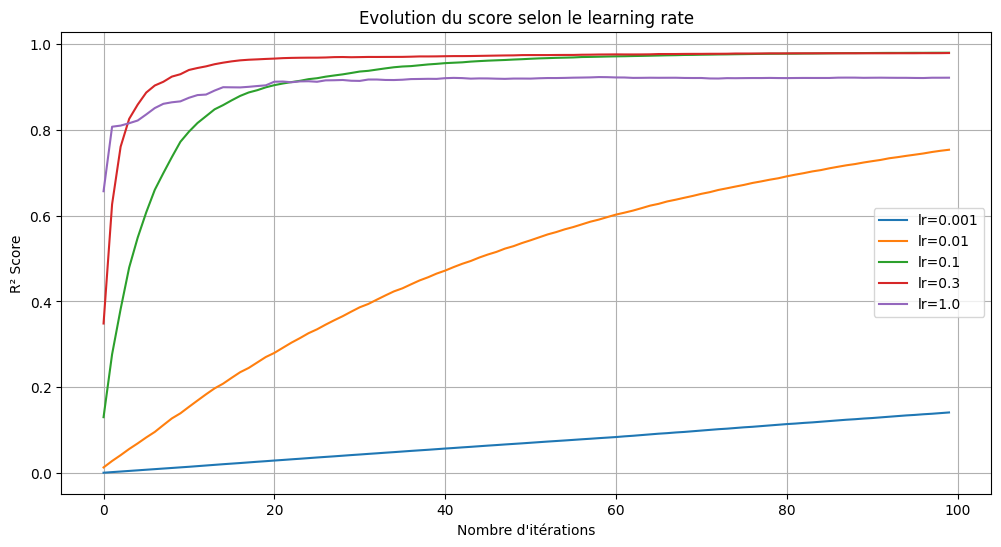

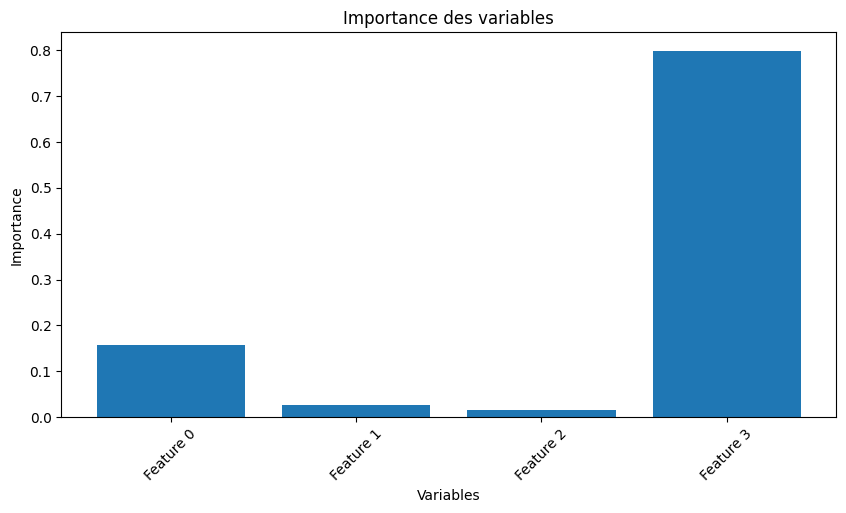

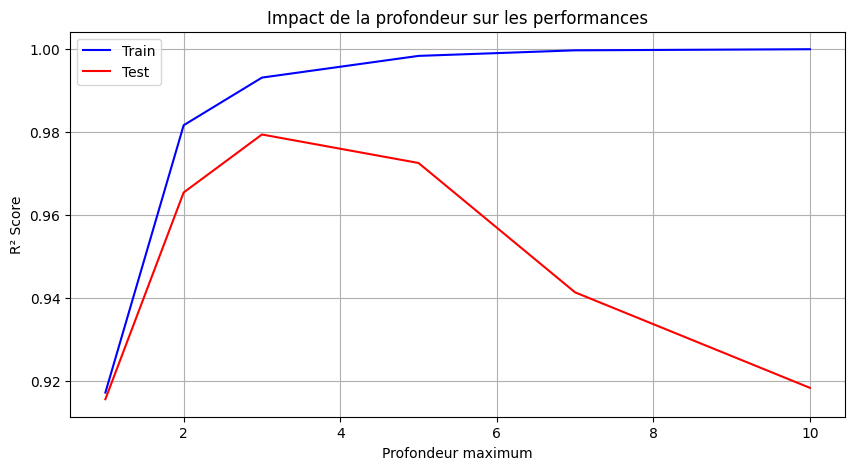

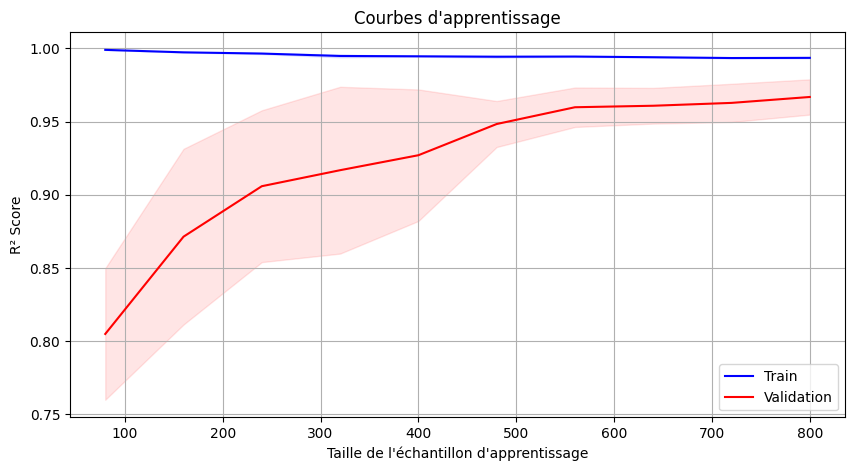

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class GradientBoostingExample:
    def __init__(self, random_state=42):
        self.gb = GradientBoostingRegressor(random_state=random_state)
        
    def generate_complex_data(self, n_samples=1000):
        """Génère des données non linéaires complexes"""
        np.random.seed(42)
        X = np.random.randn(n_samples, 4)
        y = (np.sin(X[:,0]) + np.cos(X[:,1]) * 
             np.exp(-X[:,2]**2) + X[:,3]**2 +
             np.random.normal(0, 0.1, n_samples))
        return X, y
        
    def analyze_learning_rate(self, X, y):
        """Analyse l'impact du learning rate"""
        learning_rates = [0.001, 0.01, 0.1, 0.3, 1.0]
        train_scores = []
        test_scores = []
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        plt.figure(figsize=(12, 6))
        
        for lr in learning_rates:
            gb = GradientBoostingRegressor(
                learning_rate=lr,
                n_estimators=100,
                random_state=42
            )
            
            # Entraînement et stockage des scores à chaque itération
            gb.fit(X_train, y_train)
            
            train_score = np.zeros((100,), dtype=np.float64)
            test_score = np.zeros((100,), dtype=np.float64)
            
            for i, y_pred in enumerate(gb.staged_predict(X_train)):
                train_score[i] = r2_score(y_train, y_pred)
            
            for i, y_pred in enumerate(gb.staged_predict(X_test)):
                test_score[i] = r2_score(y_test, y_pred)
                
            plt.plot(test_score, label=f'lr={lr}')
            
        plt.xlabel('Nombre d\'itérations')
        plt.ylabel('R² Score')
        plt.title('Evolution du score selon le learning rate')
        plt.legend()
        plt.grid(True)
        
    def plot_feature_importance(self, X, y, feature_names=None):
        """Visualise l'importance des variables"""
        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]
            
        self.gb.fit(X, y)
        importance = self.gb.feature_importances_
        
        plt.figure(figsize=(10, 5))
        plt.bar(feature_names, importance)
        plt.title('Importance des variables')
        plt.xlabel('Variables')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        
    def analyze_max_depth(self, X, y):
        """Analyse l'impact de la profondeur des arbres"""
        max_depths = [1, 2, 3, 5, 7, 10]
        train_scores = []
        test_scores = []
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        for depth in max_depths:
            gb = GradientBoostingRegressor(
                max_depth=depth,
                n_estimators=100,
                random_state=42
            )
            gb.fit(X_train, y_train)
            
            train_scores.append(r2_score(y_train, gb.predict(X_train)))
            test_scores.append(r2_score(y_test, gb.predict(X_test)))
            
        plt.figure(figsize=(10, 5))
        plt.plot(max_depths, train_scores, 'b-', label='Train')
        plt.plot(max_depths, test_scores, 'r-', label='Test')
        plt.xlabel('Profondeur maximum')
        plt.ylabel('R² Score')
        plt.title('Impact de la profondeur sur les performances')
        plt.legend()
        plt.grid(True)
        
    def plot_learning_curves(self, X, y):
        """Trace les courbes d'apprentissage"""
        train_sizes = np.linspace(0.1, 1.0, 10)
        
        train_sizes, train_scores, test_scores = learning_curve(
            self.gb, X, y,
            train_sizes=train_sizes,
            cv=5,
            scoring='r2'
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        plt.figure(figsize=(10, 5))
        plt.plot(train_sizes, train_mean, 'b-', label='Train')
        plt.fill_between(train_sizes, 
                        train_mean - train_std,
                        train_mean + train_std,
                        alpha=0.1,
                        color='b')
        
        plt.plot(train_sizes, test_mean, 'r-', label='Validation')
        plt.fill_between(train_sizes,
                        test_mean - test_std,
                        test_mean + test_std,
                        alpha=0.1,
                        color='r')
        
        plt.xlabel('Taille de l\'échantillon d\'apprentissage')
        plt.ylabel('R² Score')
        plt.title('Courbes d\'apprentissage')
        plt.legend()
        plt.grid(True)

# Exemple d'utilisation
gb_example = GradientBoostingExample()
X, y = gb_example.generate_complex_data()
gb_example.analyze_learning_rate(X, y)
gb_example.plot_feature_importance(X, y)
gb_example.analyze_max_depth(X, y)
gb_example.plot_learning_curves(X, y)